In [3]:
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
df = pd.read_csv('/Users/satvik/Downloads/opel_corsa_01.csv', delimiter=';')


In [5]:
df = df.drop_duplicates()


In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

In [7]:
df

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
59,"-2,2999878","25,67051888","13,22350089","121,5926897","-2,4769802","0,3555","4,705882549",68,106,1796,"15,81000042",24,"-0,1133","19,49733543",SmoothCondition,LowCongestionCondition,EvenPaceStyle
60,"-2,0999756","24,09425926","13,63891915","120,4225707","-1,57625962","0,4492","10,58823586",68,103,1689,"14,64999962",22,"-0,1289","19,51572227",SmoothCondition,LowCongestionCondition,EvenPaceStyle
61,"-1,5","22,74317932","14,03104293","118,4567689","-1,35107994","0,4258","27,45098114",68,103,1599,"11,85000038",21,"-0,1328","19,44176483",SmoothCondition,LowCongestionCondition,EvenPaceStyle
62,"0,1000366","22,29281998","14,17107305","117,5713084","-0,45035934","0,414","24,31372643",69,104,1620,"12,21000004",20,"-0,0859","19,38876915",SmoothCondition,LowCongestionCondition,EvenPaceStyle
63,"0,0999756","23,64389992","14,3289535","117,0741485","1,35107994","0,3945",20,69,104,1708,"11,90999985",21,"-0,0664","19,30163765",SmoothCondition,LowCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,"-4,9000244","110,7885513","114,2488227","37,91601699","1,8014297","0,0273","17,64705849",82,111,2216,"18,01000023",21,"0,1406","9,631930351",SmoothCondition,LowCongestionCondition,EvenPaceStyle
7388,"-5,2000122","110,7885513","114,0799377","37,33526408",0,"0,0625","23,13725471",82,112,2209,"16,89999962",20,"0,1289","9,56551075",SmoothCondition,LowCongestionCondition,EvenPaceStyle
7389,-5,"111,6892776","113,9148057","36,44661885","0,9007263","0,0391","29,80392265",82,113,2208,"18,76000023",20,"0,1016","9,495972633",SmoothCondition,LowCongestionCondition,EvenPaceStyle
7390,"-5,2000122","111,0137405","113,6933788","34,71162787","-0,6755371","0,0625","37,64706039",82,120,2210,"21,69000053",21,"0,0742","9,433367729",SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [15]:
category_mapping = {
    'LowCongestionCondition': 1,
    'NormalCongestionCondition': 2,
    'HighCongestionCondition': 3
}

df['traffic'] = df['traffic'].replace(category_mapping)

In [17]:
print(df.dtypes)

VehicleSpeedInstantaneous    float64
VehicleSpeedAverage          float64
VehicleSpeedVariance         float64
VehicleSpeedVariation        float64
LongitudinalAcceleration     float64
EngineLoad                   float64
EngineCoolantTemperature       int64
ManifoldAbsolutePressure       int64
EngineRPM                      int64
MassAirFlow                  float64
IntakeAirTemperature           int64
VerticalAcceleration         float64
FuelConsumptionAverage       float64
traffic                        int64
dtype: object


In [19]:
# df = df.drop(columns = ['AltitudeVariation','drivingStyle','roadSurface'])

In [20]:
df

,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,traffic
59,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.810000,24,-0.1133,19.497335,1
60,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.650000,22,-0.1289,19.515722,1
61,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.850000,21,-0.1328,19.441765,1
62,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.210000,20,-0.0859,19.388769,1
63,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.910000,21,-0.0664,19.301638,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,110.788551,114.248823,37.916017,1.801430,0.0273,17.647058,82,111,2216,18.010000,21,0.1406,9.631930,1
7388,110.788551,114.079938,37.335264,0.000000,0.0625,23.137255,82,112,2209,16.900000,20,0.1289,9.565511,1
7389,111.689278,113.914806,36.446619,0.900726,0.0391,29.803923,82,113,2208,18.760000,20,0.1016,9.495973,1
7390,111.013740,113.693379,34.711628,-0.675537,0.0625,37.647060,82,120,2210,21.690001,21,0.0742,9.433368,1


In [21]:
np.any(np.isnan(df))

False

In [22]:
df = df.dropna()

In [31]:
df.describe()

,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,traffic
count,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000
mean,36.428319,36.723932,213.004353,-0.029563,0.143530,26.487416,77.924979,116.234157,1569.145354,16.358274,16.048878,0.055929,15.446272,1.145780
std,32.901312,29.366391,205.717663,2.390997,0.744697,19.462750,7.076616,20.660674,551.406613,9.488889,4.342145,0.379679,4.311013,0.502152
min,0.000000,0.000000,0.000000,-17.789218,-2.380000,0.000000,40.000000,98.000000,752.000000,4.010000,7.000000,-1.246000,7.271883,1.000000
25%,8.782019,16.698035,54.333652,-0.900722,-0.339800,13.725491,79.000000,102.000000,936.000000,8.080000,12.000000,-0.222700,12.319374,1.000000
50%,29.273399,28.312631,144.864363,0.000000,0.140800,25.490196,80.000000,109.000000,1659.500000,15.330000,16.000000,0.070300,15.284765,1.000000
75%,54.043198,47.595544,299.377339,0.900721,0.683600,34.901962,81.000000,122.000000,2033.000000,21.690001,19.000000,0.312000,18.393147,1.000000
max,124.749725,121.330733,1051.789888,12.384899,2.360000,100.000000,85.000000,252.000000,3104.000000,73.250000,34.000000,1.210000,25.666862,3.000000


In [25]:
df = df.reset_index(drop=True)

In [37]:
df["traffic"].value_counts()[1]

6461

In [56]:
from scipy.stats import zscore
col=df.columns
df[col] = df[col].apply(zscore)
z_threshold = 1
filtered_df = df[(df[col] < z_threshold) & (df[col] > -z_threshold)]


In [58]:

filtered_df

,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,traffic
0,-0.326995,-0.800306,-0.444387,NaN,0.284659,NaN,NaN,-0.495380,0.411440,-0.057785,NaN,-0.445746,0.939768,-0.290331
1,-0.374907,-0.786159,-0.450075,-0.646929,0.410491,-0.816961,NaN,-0.640594,0.217377,-0.180042,NaN,-0.486836,0.944033,-0.290331
2,-0.415975,-0.772805,-0.459631,-0.552745,0.379067,0.049512,NaN,-0.640594,0.054147,-0.475145,NaN,-0.497109,0.926877,-0.290331
3,-0.429664,-0.768037,-0.463936,-0.176004,0.363220,-0.111693,NaN,-0.592189,0.092234,-0.437203,0.910012,-0.373575,0.914583,-0.290331
4,-0.388596,-0.762660,-0.466353,0.577475,0.337033,-0.333348,NaN,-0.592189,0.251837,-0.468821,NaN,-0.322212,0.894370,-0.290331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,NaN,NaN,-0.851170,0.765841,-0.156088,-0.454252,0.575884,-0.253357,NaN,0.174082,NaN,0.223024,NaN,-0.290331
7034,NaN,NaN,-0.853994,0.012365,-0.108817,-0.172144,0.575884,-0.204953,NaN,0.057095,0.910012,0.192206,NaN,-0.290331
7035,NaN,NaN,-0.858314,0.389108,-0.140242,0.170415,0.575884,-0.156548,NaN,0.253127,0.910012,0.120298,NaN,-0.290331
7036,NaN,NaN,-0.866748,-0.270188,-0.108817,0.573426,0.575884,0.182284,NaN,0.561931,NaN,0.048127,NaN,-0.290331


In [85]:
import scipy.optimize
def mahalanobis(x=None,data=None, cov=None):
    x_minus_mu=x-np.mean(data)
    if not cov:
        cov=np.cov(data.values.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term=np.dot(x_minus_mu, inv_covmat)
    mahal=np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

cols=['VehicleSpeedAverage','VehicleSpeedVariance',	'VehicleSpeedVariation','LongitudinalAcceleration',	'EngineLoad',	'EngineCoolantTemperature',	'ManifoldAbsolutePressure',	'EngineRPM',	'MassAirFlow',	'IntakeAirTemperature'	,'VerticalAcceleration', 'FuelConsumptionAverage']
df_x=df[cols]
df_x['mahala'] = mahalanobis(x=df_x,data=df[cols])
df_x.head()


/var/folders/cd/h79kxljn72b_9hpb83kyjqj00000gn/T/ipykernel_15378/1559103413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['mahala'] = mahalanobis(x=df_x,data=df[cols])


,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,mahala
0,-0.800306,-0.444387,-1.023670,0.284659,-1.119219,-1.402603,-0.495380,0.411440,-0.057785,1.831281,-0.445746,0.939768,12.578806
1,-0.786159,-0.450075,-0.646929,0.410491,-0.816961,-1.402603,-0.640594,0.217377,-0.180042,1.370646,-0.486836,0.944033,8.886313
2,-0.772805,-0.459631,-0.552745,0.379067,0.049512,-1.402603,-0.640594,0.054147,-0.475145,1.140329,-0.497109,0.926877,7.432368
3,-0.768037,-0.463936,-0.176004,0.363220,-0.111693,-1.261283,-0.592189,0.092234,-0.437203,0.910012,-0.373575,0.914583,5.682264
4,-0.762660,-0.466353,0.577475,0.337033,-0.333348,-1.261283,-0.592189,0.251837,-0.468821,1.140329,-0.322212,0.894370,6.710717


<Axes: >

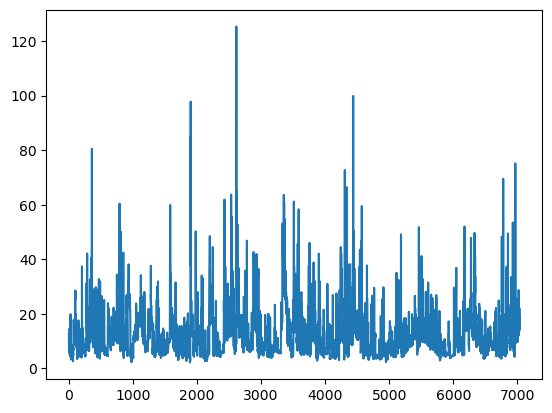

In [87]:
df_x['mahala'].plot()

In [90]:
df_x[df_x['mahala']>30]

,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,mahala
204,0.830981,-0.823249,-5.544547,1.757713,-0.212445,0.010602,-0.640594,-1.177337,-0.747061,-1.623478,-1.731660,-0.482159,37.331640
274,-1.110554,-0.855291,3.308840,-0.129767,0.976436,0.293243,-0.253357,0.344334,0.747425,-0.471892,-0.167860,-0.367728,31.146361
285,-1.055341,-0.612436,-5.073623,0.384170,-0.232596,0.293243,-0.640594,-1.326058,-0.788164,-1.393161,-0.805813,-0.366210,42.099855
326,-1.006007,-0.385077,2.649544,-1.089689,-1.361025,0.293243,2.118467,2.466331,2.213454,0.219060,0.274650,-0.293813,32.199242
329,-0.928427,-0.055728,2.932098,-1.671846,2.830285,0.293243,4.054650,1.282003,2.808929,-0.011257,1.179952,-0.282326,32.652461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,-0.380769,0.487142,3.779765,-0.454889,1.057038,0.434564,-0.640594,-0.357557,-0.008249,0.219060,0.017309,-1.463833,33.426448
6928,-0.183177,-0.057455,-6.109658,0.226779,-0.313198,0.575884,-0.640594,-1.193660,-1.198147,-0.932526,-0.486836,-1.251525,53.451070
6932,-0.174486,-0.080627,2.555360,0.095710,-1.219972,0.575884,2.457299,1.240288,2.656108,1.140329,-0.600098,-1.224359,40.752017
6937,-0.117356,-0.111908,0.577474,-0.538956,-0.151994,0.575884,2.408894,0.830398,0.542961,0.449377,0.356831,-1.180521,34.350898


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

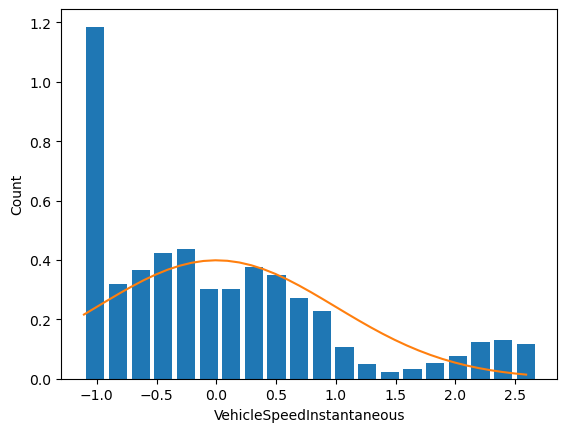

In [62]:
from scipy.stats import norm
import numpy as np
plt.hist(df.VehicleSpeedInstantaneous, bins=20, rwidth=0.8, density=True)
plt.xlabel('VehicleSpeedInstantaneous')
plt.ylabel('Count')

rng = np.arange(df.VehicleSpeedInstantaneous.min(), df.VehicleSpeedInstantaneous.max(), 0.1)

plt.plot(rng, norm.pdf(rng,df.VehicleSpeedInstantaneous.mean(),df.VehicleSpeedInstantaneous.std()))

In [67]:
df.VehicleSpeedInstantaneous.count()

7038

In [65]:
df.VehicleSpeedInstantaneous.mean()


1.2114965656608699e-17

In [66]:
df.VehicleSpeedInstantaneous.std()

1.0000710504814496

In [71]:
upperLimit=df.VehicleSpeedInstantaneous.mean()+ 2*df.VehicleSpeedInstantaneous.std()
upperLimit

2.0001421009628992

In [72]:
lowerLimit=df.VehicleSpeedInstantaneous.mean()- 2*df.VehicleSpeedInstantaneous.std()
lowerLimit

-2.0001421009628992

In [73]:
df[(df.VehicleSpeedInstantaneous>upperLimit) | (df.VehicleSpeedInstantaneous<lowerLimit)]

,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,traffic
696,2.287638,2.720242,-0.941728,0.294919,0.357849,1.701855,0.575884,2.021658,1.240288,1.596900,0.449377,-1.474583,-1.263318,-0.290331
697,2.321861,2.716664,-0.941124,0.483290,0.300103,1.681705,0.575884,2.118467,1.240288,1.621140,0.449377,-1.690570,-1.266364,-0.290331
698,2.308172,2.712318,-0.940820,-0.176006,0.279959,1.681705,0.575884,2.166871,1.262052,1.641165,0.449377,-1.515673,-1.268988,-0.290331
699,2.321861,2.708739,-0.940458,0.200737,0.216842,1.742156,0.575884,2.263681,1.276562,1.742343,0.449377,-1.515673,-1.270208,-0.290331
700,2.349240,2.705416,-0.940871,0.389105,0.216842,1.742156,0.575884,2.312085,1.296512,1.752883,0.449377,-1.381866,-1.274414,-0.290331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,2.260260,2.640106,-0.851170,0.765841,-0.156088,-0.454252,0.575884,-0.253357,1.173183,0.174082,1.140329,0.223024,-1.348814,-0.290331
7034,2.260260,2.634355,-0.853994,0.012365,-0.108817,-0.172144,0.575884,-0.204953,1.160487,0.057095,0.910012,0.192206,-1.364222,-0.290331
7035,2.287638,2.628732,-0.858314,0.389108,-0.140242,0.170415,0.575884,-0.156548,1.158673,0.253127,0.910012,0.120298,-1.380353,-0.290331
7036,2.267105,2.621191,-0.866748,-0.270188,-0.108817,0.573426,0.575884,0.182284,1.162300,0.561931,1.140329,0.048127,-1.394877,-0.290331


In [39]:

z_scores = np.abs(stats.zscore(df))
data_clean = df[(z_scores < 3).all(axis=1)]

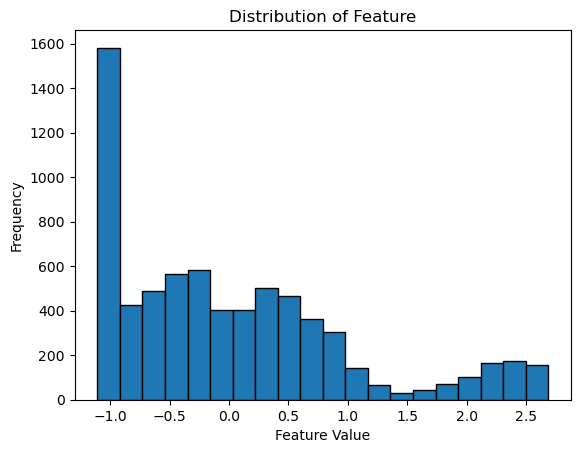

In [47]:
import matplotlib.pyplot as plt

# Assuming 'data_clean' is your cleaned DataFrame
plt.hist(df['VehicleSpeedInstantaneous'], bins=20, edgecolor='black')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Distribution of Feature')
plt.show()
